In [1]:
# import the load_boston() function from sklearn.datasets
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns

boston = load_boston()

bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target

X = bos[["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]]
y = bos[['PRICE']]

In [2]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

# calculate the PCA
pca = PCA(n_components=2)

# Find the principle components of 17 features
X_r = pca.fit_transform(X)

print(X_r)

[[-119.81884272   -5.56005586]
 [-168.89015548   10.11620863]
 [-169.31170747   14.0805323 ]
 ...
 [-138.38716306    0.9380922 ]
 [-137.50517338    4.2518251 ]
 [-139.19033295    1.00906423]]


IndexError: index 13 is out of bounds for axis 0 with size 13

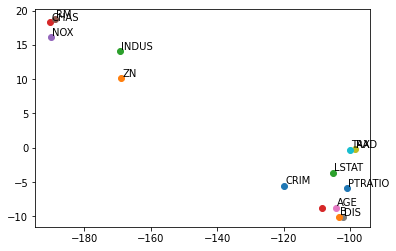

In [4]:
# Lets visualize the principle components

for feature, (plot_x,plot_y) in enumerate(zip(X_r[:, 0], X_r[:, 1])):
    plt.scatter(plot_x, plot_y)
    plt.text(plot_x+0.3, plot_y+0.3, bos.columns[:-1][feature])

plt.show()

In [14]:
# PCA computation by sklearn
pca = PCA(n_components=6)
X_r = pca.fit_transform(X)
print(X_r)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[[-1.19818843e+02 -5.56005586e+00 -3.17269264e+00  5.29159311e+00
  -1.81872849e+00 -6.31207007e+00]
 [-1.68890155e+02  1.01162086e+01 -3.07818868e+01  1.29677590e+00
   3.69679746e-01 -3.24182071e+00]
 [-1.69311707e+02  1.40805323e+01 -1.67536282e+01 -1.02783989e+01
  -9.34090116e-02 -5.91006769e+00]
 ...
 [-1.38387163e+02  9.38092201e-01 -3.72851813e+01  8.07369031e+00
  -2.36890214e+00 -5.82992082e+00]
 [-1.37505173e+02  4.25182510e+00 -3.59883419e+01  7.01643434e+00
  -2.10285886e+00 -4.91173942e+00]
 [-1.39190333e+02  1.00906423e+00 -2.97724323e+01  1.67685973e+00
  -1.36945810e+00 -2.65149755e+00]]
[3.08899113e+04 6.25033006e+03 8.18363958e+02 2.66684838e+02
 4.98315275e+01 2.78767934e+01]
[8.05823175e-01 1.63051968e-01 2.13486092e-02 6.95699061e-03
 1.29995193e-03 7.27220158e-04]
[0.80582318 0.96887514 0.99022375 0.99718074 0.99848069 0.99920791]


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [16]:
from sklearn.linear_model import LinearRegression

best_fit = LinearRegression().fit(X_train, y_train)

In [17]:
print("r^2: " + str(best_fit.score(X_test, y_test)))

print("slope: " + str(best_fit.coef_))

print("intercept: " + str(best_fit.intercept_))

r^2: 0.6354638433202133
slope: [[-1.17735289e-01  4.40174969e-02 -5.76814314e-03  2.39341594e+00
  -1.55894211e+01  3.76896770e+00 -7.03517828e-03 -1.43495641e+00
   2.40081086e-01 -1.12972810e-02 -9.85546732e-01  8.44443453e-03
  -4.99116797e-01]]
intercept: [36.93325546]


In [18]:
from sklearn.metrics import mean_squared_error

pred_y = best_fit.predict(X_test)
ns_MSE = mean_squared_error(y_test, pred_y)
print("MSE: " + str(mean_squared_error(y_test, pred_y)))

MSE: 29.782245092302336


In [13]:
len(pred_y==y_test)

127